In [26]:
import numpy as np

import astropy.units as u
from astropy.io import votable
from astropy.table import Table
from astropy.wcs import WCS

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [27]:
obs = votable.parse_single_table("consecutive_obs.vot").to_table()
days = votable.parse_single_table("consecutive_obs.vot").to_table()
sun = Table.read("1147393800_sun.csv")

In [28]:
# writing my own fits header parser: a terrible idea!
header ={}
for line in open("/home/jmorgan/tma/1147280248_header.txt"):
    line = line[:30].split('=')
    if not len(line) == 2:
        continue
    if line[1].strip().startswith("'"):
        line[1] = line[1].strip()[1:-1].strip()
    try:
        header[line[0].strip()] = float(line[1].strip())
    except:
        header[line[0].strip()] = line[1].strip()
        
print header
wcs = WCS(header)
print wcs.celestial

{'EXTEND': 'T', 'SIMPLE': 'T', 'CDELT1': 0.3515625, 'CDELT2': 0.3515625, 'CDELT3': 15360000.0, 'CDELT4': 1.0, 'NAXIS': 4.0, 'DATE-OBS': '2015-04-29T00:36:5', 'SUNBEAM': 0.000459827104350552, 'SUNRA': 55.01917498838092, 'BITPIX': -32.0, 'NAXIS1': 120.0, 'NAXIS3': 1.0, 'NAXIS2': 120.0, 'NAXIS4': 1.0, 'SUNDEC': 19.55461406521493, 'BEAMMAX': 0.6458600163459778, 'CRVAL3': 158060000.0, 'CRPIX4': 1.0, 'CRVAL4': -5.0, 'CRVAL2': 0.0, 'CRPIX1': 566.0, 'CRPIX2': 278.0, 'CRPIX3': 1.0, 'CRVAL1': 0.0, 'CTYPE4': 'STOKES', 'CTYPE3': 'FREQ', 'CTYPE2': 'DEC--AIT', 'CTYPE1': 'RA---AIT'}
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---AIT'  'DEC--AIT'  
CRVAL : 0.0  0.0  
CRPIX : 566.0  278.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.3515625  0.3515625  
NAXIS : 120.0  120.0  1.0  1.0


In [29]:
def unwrap(a, wrap=180):
    return np.where(a>wrap, a-(wrap*2), a)

# to fix

- reverse RA axis

- fix colorbar ticks

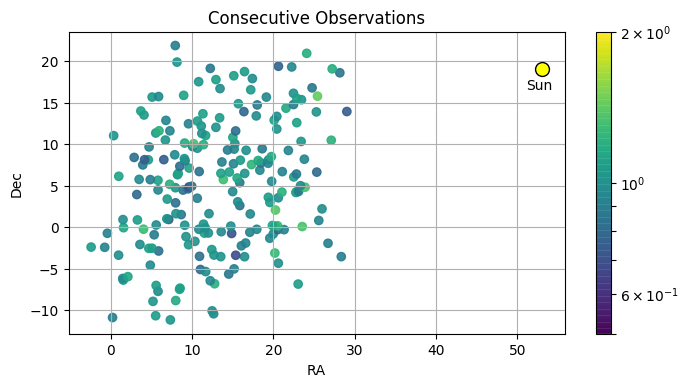

In [52]:
both = ~obs['nsi_1'].mask & ~obs['nsi_2'].mask
cat = obs[both]
plt.figure(figsize=(8,4))
#plt.subplot(111, projection=wcs.celestial)
plt.title("Consecutive Observations")
plt.grid(True)
plt.scatter(unwrap(cat['RA_tgss']), cat['DEC_tgss'], c =cat['nsi_1']/cat['nsi_2'], 
            alpha=0.9, cmap=plt.cm.get_cmap('viridis'), norm=LogNorm(vmin=0.5, vmax=2.0))
plt.plot(unwrap(sun['RAJ2000']), sun['DEJ2000'], 'o', markersize=10, color='yellow', markeredgecolor='black')
plt.text(unwrap(sun['RAJ2000'])-2, sun['DEJ2000']-2.5, 'Sun')

#plt.subplots_adjust(top=0.95,bottom=0.0)
#plt.xlim(-5, 30)
plt.xlabel("RA")
plt.ylabel("Dec")
plt.clim(0.5, 2)
plt.colorbar()
#plt.grid()

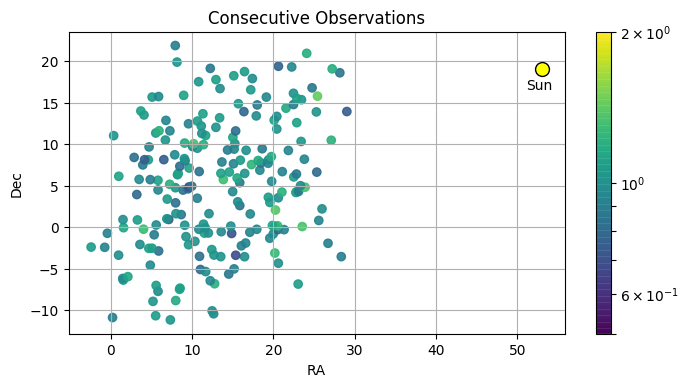

In [52]:
both = ~obs['nsi_1'].mask & ~obs['nsi_2'].mask
cat = obs[both]
plt.figure(figsize=(8,4))
#plt.subplot(111, projection=wcs.celestial)
plt.title("Consecutive Observations")
plt.grid(True)
plt.scatter(unwrap(cat['RA_tgss']), cat['DEC_tgss'], c =cat['nsi_1']/cat['nsi_2'], 
            alpha=0.9, cmap=plt.cm.get_cmap('viridis'), norm=LogNorm(vmin=0.5, vmax=2.0))
plt.plot(unwrap(sun['RAJ2000']), sun['DEJ2000'], 'o', markersize=10, color='yellow', markeredgecolor='black')
plt.text(unwrap(sun['RAJ2000'])-2, sun['DEJ2000']-2.5, 'Sun')

#plt.subplots_adjust(top=0.95,bottom=0.0)
#plt.xlim(-5, 30)
plt.xlabel("RA")
plt.ylabel("Dec")
plt.clim(0.5, 2)
plt.colorbar()
#plt.grid()

In [53]:
both = ~cme_nocme['nsi_1'].mask & ~cme_nocme['nsi_2'].mask
cat = cme_nocme[both]
plt.figure(figsize=(10,8))
#plt.subplot(111, projection=wcs.celestial)
plt.title("observations in both")
plt.grid(True)
plt.scatter(unwrap(cat['RA_tgss']), cat['DEC_tgss'], c =cat['nsi_1']/cat['nsi_2'], 
            alpha=0.9, cmap=plt.cm.get_cmap('viridis'), norm=LogNorm(vmin=0.5, vmax=2.0)) 
#plt.subplots_adjust(top=0.95,bottom=0.0)
plt.clim(0.5, 2)
plt.colorbar()
#plt.grid()

NameError: name 'cme_nocme' is not defined

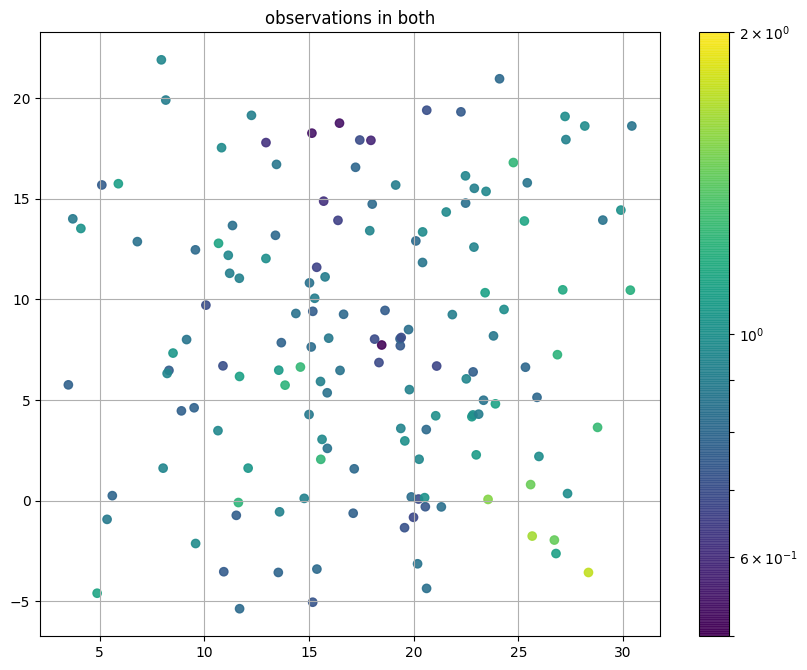

In [8]:
both = ~nocme_nocme['nsi_1'].mask & ~nocme_nocme['nsi_2'].mask
cat = nocme_nocme[both]
#cat1 = nocme_nocme[nocme_nocme['nsi_2'].mask]
#cat2 = nocme_nocme[nocme_nocme['nsi_1'].mask]


plt.figure(figsize=(10,8))
#plt.subplot(111, projection=wcs.celestial)
plt.title("observations in both")
plt.grid(True)
plt.scatter(cat['RA_tgss'], cat['DEC_tgss'], c =cat['nsi_2']/cat['nsi_1'], 
            alpha=0.9, cmap=plt.cm.get_cmap('viridis'), norm=LogNorm(vmin=0.5, vmax=2.0)) 

#plt.scatter(unwrap(cat1['RA_tgss']), cat1['DEC_tgss'], c = np.zeros(len(cat1)), marker='x',
#            alpha=0.9) 
#plt.scatter(unwrap(cat2['RA_tgss']), cat2['DEC_tgss'], c = np.zeros(len(cat2)), marker='+',
#            alpha=0.9) 


#plt.subplots_adjust(top=0.95,bottom=0.0)
plt.clim(0.5, 2)
plt.colorbar()
#plt.grid()

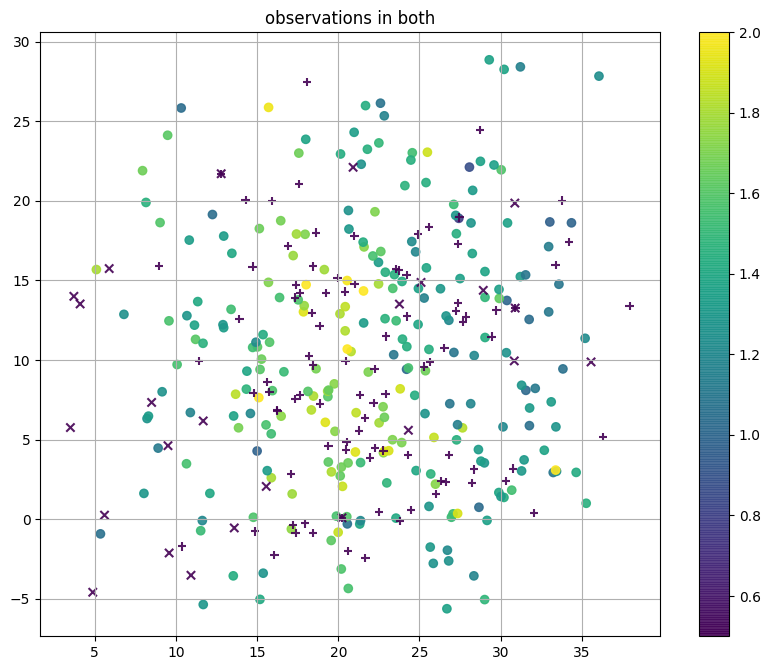

In [12]:
both = ~cme_nocme['nsi_1'].mask & ~cme_nocme['nsi_2'].mask
cat = cme_nocme[both]
cat1 = cme_nocme[cme_nocme['nsi_2'].mask]
cat2 = cme_nocme[cme_nocme['nsi_1'].mask]

plt.figure(figsize=(10,8))
#plt.subplot(111, projection=wcs.celestial)
plt.title("observations in both")
plt.grid(True)
plt.scatter(cat['RA_tgss'], cat['DEC_tgss'], c =cat['nsi_2']/cat['nsi_1'], 
            alpha=0.9, cmap=plt.cm.get_cmap('viridis'), norm=LogNorm(vmin=0.5, vmax=2.0)) 
plt.scatter(cat1['RA_tgss'], cat1['DEC_tgss'], c = np.zeros(len(cat1)), marker='x',
            alpha=0.9) 
plt.scatter(cat2['RA_tgss'], cat2['DEC_tgss'], c = np.zeros(len(cat2)), marker='+',
            alpha=0.9) 

#plt.subplots_adjust(top=0.95,bottom=0.0)
plt.clim(0.5, 2)
plt.colorbar()
#plt.grid()